In [216]:
# To load the library
import src.rmf_tool as rmf

import importlib
importlib.reload(rmf)

# To plot the results 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [206]:
# This code creates an object that represents a "density dependent population process"
ddpp = rmf.DDPP() 
# We then add the three transitions : 
DIMENSION=2
if (DIMENSION==3):
    ddpp.add_transition([-1,1,0],lambda x:x[0]+2*x[0]*x[1])
    ddpp.add_transition([0,-1,1],lambda x:x[1])
    ddpp.add_transition([1,0,-1],lambda x:3*(1-x[0]-x[1]))
    ddpp.set_initial_state([.3,.2,.5]) # We first need to define an initial stater
else:
    ddpp.add_transition([-1,1],lambda x:x[0]+2*x[0]*x[1])
    ddpp.add_transition([0,-1],lambda x:x[1])
    ddpp.add_transition([1,0,],lambda x:3*(1-x[0]-x[1]))
    ddpp.set_initial_state([.3,.2]) # We first need to define an initial stater
    



In [207]:
#pi,V,A,_= ddpp.meanFieldExapansionSteadyState(order=2)
#pi,V2,A,_= ddpp2.meanFieldExapansionSteadyState(order=2)
# V,V2

V = ddpp.theoreticalV_new()
pi,V,(V2,W) = ddpp.meanFieldExapansionSteadyState(order=1)
pi,V,A,(V2,W,A2,B,C,D) = ddpp.meanFieldExapansionSteadyState(order=2)
Ass = A
Vss = V
V,np.array([ 0.15875529, -0.11906646, -0.03968882]), W, np.array([[ 0.24324473, -0.19544478],
        [-0.19544478,  0.29785822]]), A

*** NOT TESTED!!! ***
rank= 2 (2, 2, 2, 2) (2, 2, 2, 2, 2) (2, 2, 2) (2, 2, 2, 2) (2, 2, 2)


(array([ 0.15875529, -0.11906646]),
 array([ 0.15875529, -0.11906646, -0.03968882]),
 array([[ 0.24324473, -0.19544478],
        [-0.19544478,  0.29785822]]),
 array([[ 0.24324473, -0.19544478],
        [-0.19544478,  0.29785822]]),
 array([-0.07551742,  0.05663807]))

time to compute drift= 0.04242205619812012


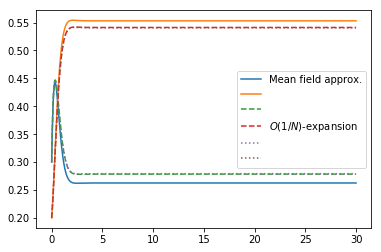

In [209]:
n=DIMENSION
T,XVWABCD=ddpp.meanFieldExapansionTransient(order=2,time=30)
X = XVWABCD[:,0:n]
V = XVWABCD[:,n:2*n]
A = XVWABCD[:,2*n+n**2:3*n+n**2]

N=10
plt.figure()
plt.plot(T,X,'-')
plt.plot(T,X+V/N,'--')
plt.plot(T,X+V/N+A/N**2,':')
plt.legend(['Mean field approx.','','','$O(1/N)$-expansion','','','$O(1/N^2)$-expansion'])

In [210]:
V[-1,:],Vss, A[-1,:], Ass

(array([ 0.15875528, -0.11906646]),
 array([ 0.15875529, -0.11906646]),
 array([ 0.07799936, -0.05849953]),
 array([-0.07551742,  0.05663807]))

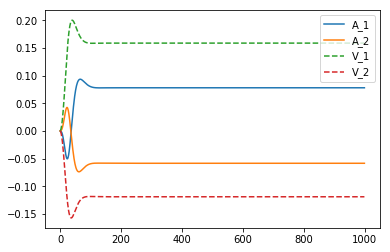

In [170]:
plt.plot(A)
plt.plot(V,'--')
plt.legend(['A_1','A_2','V_1','V_2'])

## Model SIS

In [190]:
sis = rmf.DDPP()
sis.add_transition(np.array([1]), lambda x : 1-x[0]*x[0])
sis.add_transition(np.array([-1]), lambda x : x[0])
sis.set_initial_state(np.array([0.5]))
pi,V,A,VA = sis.meanFieldExapansionSteadyState(order=2)
pi,V,A

*** NOT TESTED!!! ***
rank= 1 (1, 1, 1, 1) (1, 1, 1, 1, 1) (1, 1, 1) (1, 1, 1, 1) (1, 1, 1)


(array([0.61803399]), array([-0.1236068]), array([-0.01527864]))

In [201]:
(1-np.sqrt(5))/10, (np.sqrt(5)-3)/50

(-0.12360679774997899, -0.015278640450004204)

time to compute drift= 0.011195898056030273


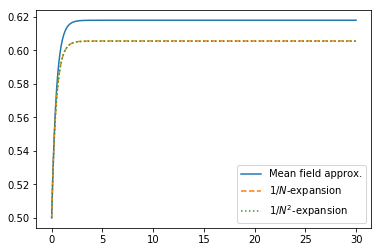

In [202]:
n=1
T,XVWABCD=sis.meanFieldExapansionTransient(order=2,time=30)
X = XVWABCD[:,0:n]
V = XVWABCD[:,n:2*n]
A = XVWABCD[:,2*n+n**2:3*n+n**2]

N=10
plt.figure()
plt.plot(T,X,'-')
plt.plot(T,X+V/N,'--')
plt.plot(T,X+V/N+A/N**2,':')
plt.legend(['Mean field approx.','$1/N$-expansion','$1/N^2$-expansion'])


In [200]:
X[-1,:], V[-1,:], A[-1,:]

(array([0.61803399]), array([-0.1236068]), array([-0.01527862]))

## Example : non-stable SIR

time to compute drift= 0.008024930953979492


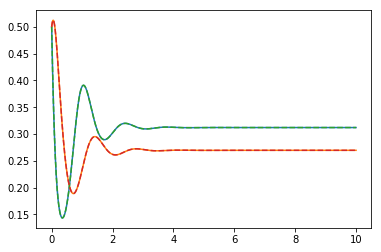

In [225]:
import misc.SIR_simulate.averageSIR as averageSIR

# This code creates an object that represents a "density dependent population process"
ddpp = rmf.DDPP() 
# We then add the three transitions : 
ddpp.add_transition([-1,1],lambda x: x[0]*(1 + 10*x[1]/(a+x[0])))
ddpp.add_transition([0,-1],lambda x: 5*x[1])
ddpp.add_transition([1,0],lambda x: (10*x[0] + 0.1)*(1-x[0]-x[1]))

ddpp.set_initial_state([.5,.5])
a=0.5
T,X = ddpp.ode(time=10)
plt.plot(T,X,'-')

# The code below should give the same curve
T,X2 = ddpp.meanFieldExapansionTransient(order=0,time=10)
plt.plot(T,X2,'--')


time to compute drift= 0.24816632270812988
50 0.5 computed in  134.29429602622986 seconds


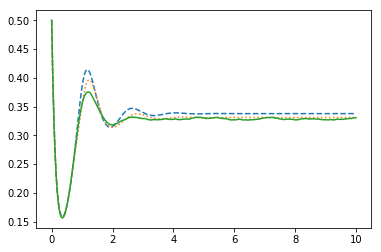

In [266]:
a=0.6
n=2
N=50
T,XVW = ddpp.meanFieldExapansionTransient(order=2,time=10)
X = XVW[:,0:n]
V = XVW[:,n:2*n]
A = XVW[:,2*n+n**2:3*n+n**2]
W = XVW[:,2*n:2*n+n**2]
plt.plot(T,(X+V/N)[:,0],'--')
plt.plot(T,(X+V/N+A/N/N)[:,0],':')
Tsimu,Ssimu,Isimu = averageSIR.averageTraj(N=N,a=a,nbSamples=1000)
plt.plot(Tsimu,Ssimu)


In [267]:
pi,Vss,Ass,VWA=ddpp.meanFieldExapansionSteadyState(order=2)
V[-1,:],Vss,A[-1,:], Ass

*** NOT TESTED!!! ***
rank= 2 (2, 2, 2, 2) (2, 2, 2, 2, 2) (2, 2, 2) (2, 2, 2, 2) (2, 2, 2)


(array([ 1.28376976, -1.32696759]),
 array([ 1.28376883, -1.32697402]),
 array([-16.93455545,   2.08249166]),
 array([-23.15526425,   6.82138139]))

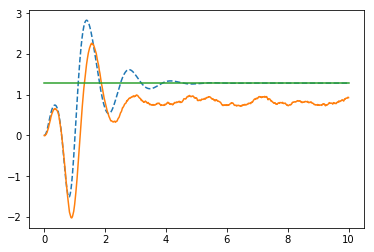

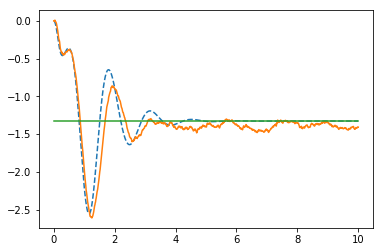

In [268]:
for i in [0,1]:
    plt.figure()
    plt.plot(T,V[:,i],'--')
    if i==0: Xsimu = Ssimu
    else: Xsimu = Isimu
    plt.plot(Tsimu,N*(Xsimu-X[:,i]))
    plt.plot(Tsimu,0*Xsimu + Vss[i])

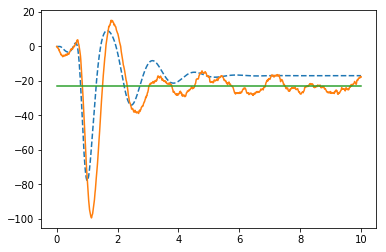

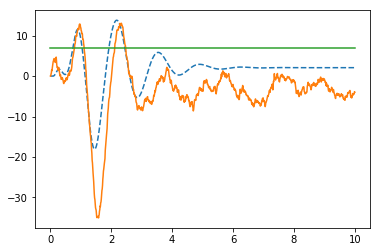

In [270]:
for i in [0,1]:
    plt.figure()
    plt.plot(T,A[:,i],'--')
    if i==0: Xsimu = Ssimu
    else: Xsimu = Isimu
    plt.plot(Tsimu,N*(N*(Xsimu-X[:,i])-V[:,i]))
    plt.plot(Tsimu,0*Xsimu + Ass[i])